# 400_Console_Life_Cycle

## Purpose

This notebook will do the analysis to answer our fourth research question based on the life cycle of a console.

## Datasets

- Input: Console_Sales_2008-2017.pkl && Console_Sales_All_Time && Clean_Games_Sales_Total.pkl
- output: 400_Console_Life_Yearly_Data.pkl && 400_Console_Sales.pkl && 400_Total_Console_Sales.pkl

In [1]:
import os 
import sys
import pandas as pd
import numpy as np 
import hashlib 
import seaborn as sns
import matplotlib.pylab as plt 

%matplotlib inline 

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 22

fig_size = plt.rcParams["figure.figsize"]


fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [3]:
if not os.path.exists("../../data/prep/Console_Sales_2008-2017.pkl"):
    print("Missing Dataset File")

In [4]:
if not os.path.exists("../../data/prep/Console_Sales_All_Time.pkl"):
    print("Missing Dataset File")

In [5]:
if not os.path.exists("../../data/prep/Clean_Games_Sales_Total.pkl"):
    print("Missing Dataset File")

## Loading the datasets

In [6]:
consoles = pd.read_pickle("../../data/prep/Console_Sales_2008-2017.pkl")
consoles.shape

(11, 12)

In [7]:
consoles_all = pd.read_pickle("../../data/prep/Console_Sales_All_Time.pkl")
consoles_all.shape

(26, 9)

In [8]:
videogames = pd.read_pickle("../../data/prep/Clean_Games_Sales_Total.pkl")
videogames.shape

(16444, 11)

## Overview of datasets

Taking a brief overview of the datasets to see the data contained in them.

In [9]:
consoles.head()

,Console,Abbreviation,Sales_2008,Sales_2009,Sales_2010,Sales_2011,Sales_2012,Sales_2013,Sales_2014,Sales_2015,Sales_2016,Sales_2017
0,Playstation 4,PS4,NaN,NaN,NaN,NaN,NaN,4.49,14.59,17.51,17.59,19.64
1,Nintendo switch,NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.85
2,Xbox one,XOne,NaN,NaN,NaN,NaN,NaN,3.08,7.91,8.63,8.37,8.21
3,Nintendo 3ds,3DS,NaN,NaN,NaN,12.56,13.48,14.31,9.74,7.33,7.59,6.19
4,Playstation vita,PSV,NaN,NaN,NaN,0.48,3.69,4.30,2.30,2.68,2.04,0.72


In [10]:
consoles['Abbreviation'].unique()

array(['PS4', 'NS', 'XOne', '3DS', 'PSV', 'PS3', 'WiiU', 'X360', 'PSP',
       'Wii', 'DS'], dtype=object)

In [11]:
consoles_all.head()

,Console,Abbreviation,Sales_NA,Sales_Europe,Sales_Japan,Sales_Rest_Of_World,Sales_Total,Release_Year,Developer
0,Playstation 2,PS2,53.65,55.28,23.18,25.57,157.68,2000,Sony
1,Nintendo DS,DS,57.39,52.07,33.01,12.43,154.90,2004,Nintendo
2,Game Boy,GB,43.18,40.05,32.47,2.99,118.69,1989,Nintendo
3,Playstation,PS,38.94,36.91,19.36,9.04,104.25,1994,Sony
4,Nintendo Wii,Wii,45.51,33.88,12.77,9.48,101.64,2006,Nintendo


In [12]:
consoles_all['Developer'].unique()

array(['Sony', 'Nintendo', 'Microsoft', 'Sega', 'Atari'], dtype=object)

In [13]:
consoles_all['Abbreviation'].unique()

array(['PS2', 'DS', 'GB', 'PS', 'Wii', 'PS3', 'X360', 'GBA', 'PSP', 'PS4',
       '3DS', 'NES', 'SNES', 'XOne', 'N64', 'GEN', '2600', 'XB', 'GC',
       'PSV', 'NS', 'WiiU', 'GG', 'SAT', 'DC', '7800'], dtype=object)

In [14]:
videogames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


In [15]:
 videogames['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

# Console life cycle analysis

## Yearly developer console releases

Getting each year that a developer released a new console

In [16]:
console_count = videogames.groupby('Year_of_Release', as_index = False)['Global_Sales'].sum()
console_count = console_count.set_index('Year_of_Release')

In [17]:
sony = consoles_all[consoles_all['Developer'] == 'Sony']
tmp = sony.groupby('Release_Year')['Abbreviation'].count()
console_count['Sony'] = tmp

In [18]:
nintendo = consoles_all[consoles_all['Developer'] == 'Nintendo']
tmp = nintendo.groupby('Release_Year')['Abbreviation'].count()
console_count['Nintendo'] = tmp

In [19]:
microsoft = consoles_all[consoles_all['Developer'] == 'Microsoft']
tmp = microsoft.groupby('Release_Year')['Abbreviation'].count()
console_count['Microsoft'] = tmp

In [20]:
sega = consoles_all[consoles_all['Developer'] == 'Sega']
tmp = sega.groupby('Release_Year')['Abbreviation'].count()
console_count['Sega'] = tmp

In [21]:
atari = consoles_all[consoles_all['Developer'] == 'Atari']
tmp = atari.groupby('Release_Year')['Abbreviation'].count()
console_count['Atari'] = tmp

In [22]:
del console_count['Global_Sales']
console_count.head()

,Sony,Nintendo,Microsoft,Sega,Atari
Year_of_Release,,,,,
1980.0,NaN,NaN,NaN,NaN,NaN
1981.0,NaN,NaN,NaN,NaN,NaN
1982.0,NaN,NaN,NaN,NaN,NaN
1983.0,NaN,1.0,NaN,NaN,NaN
1984.0,NaN,NaN,NaN,NaN,NaN


In [23]:
console_Sales = consoles_all.groupby('Developer')['Sales_Total'].sum()
console_Sales

Developer
Atari         31.94
Microsoft    147.07
Nintendo     722.50
Sega          57.18
Sony         521.16
Name: Sales_Total, dtype: float64

Text(0,0.5,'Sales in millions')

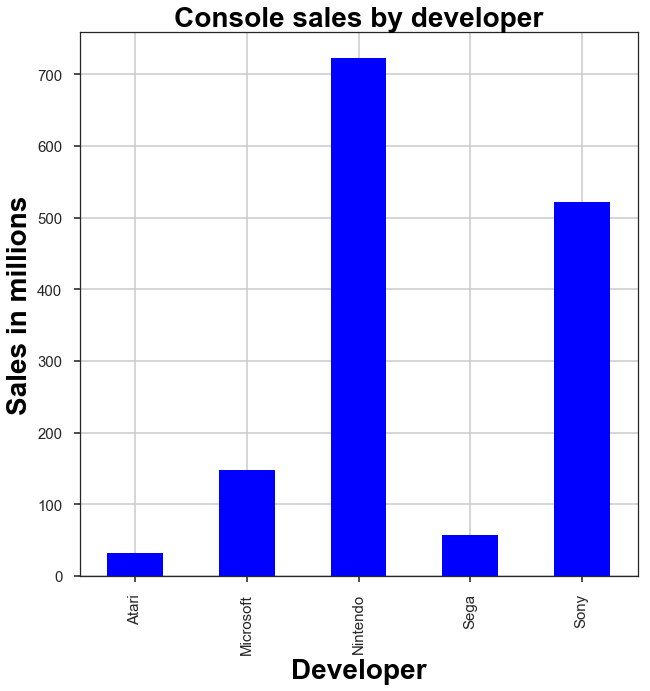

In [24]:
ax = console_Sales.plot( kind = 'bar',color = 'b', title = 'Console sales by developer')
ax.set_xlabel("Developer")
ax.set_ylabel("Sales in millions")

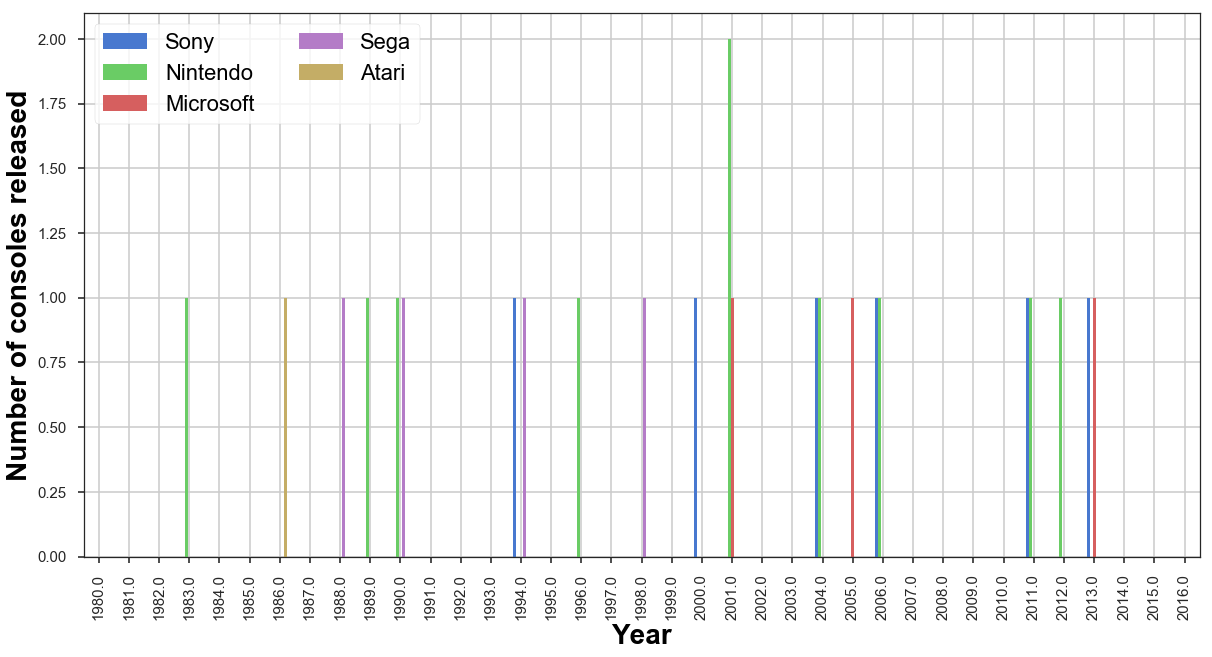

In [25]:
ax = console_count.plot(y = ['Sony', 'Nintendo', 'Microsoft','Sega', 'Atari'], kind = 'bar',figsize = (20,10))
ax.set_xlabel("Year")
ax.set_ylabel("Number of consoles released")
ax.legend( frameon=True, ncol=2, loc='upper left')

## Yearly console sales

Graphing the yearly sales of each console in the consoles dataset

In [26]:
consoles1 = consoles
del consoles1['Abbreviation']
consoles1 = consoles1.set_index('Console')
consoles1.rename(columns={'Sales_2008': 2008}, inplace=True)
consoles1.rename(columns={'Sales_2009': 2009}, inplace=True)
consoles1.rename(columns={'Sales_2010': 2010}, inplace=True)
consoles1.rename(columns={'Sales_2011': 2011}, inplace=True)
consoles1.rename(columns={'Sales_2012': 2012}, inplace=True)
consoles1.rename(columns={'Sales_2013': 2013}, inplace=True)
consoles1.rename(columns={'Sales_2014': 2014}, inplace=True)
consoles1.rename(columns={'Sales_2015': 2015}, inplace=True)
consoles1.rename(columns={'Sales_2016': 2016}, inplace=True)
consoles1.rename(columns={'Sales_2017': 2017}, inplace=True)
consoles1 = consoles1.transpose()
consoles1.index.name = 'Year'

In [27]:
consoles1.columns.values

array(['Playstation 4', 'Nintendo switch', 'Xbox one', 'Nintendo 3ds',
       'Playstation vita', 'Playstation 3', 'Nintendo wii u', 'Xbox 360',
       'PSP', 'Nintendo wii', 'Nintendo ds'], dtype=object)

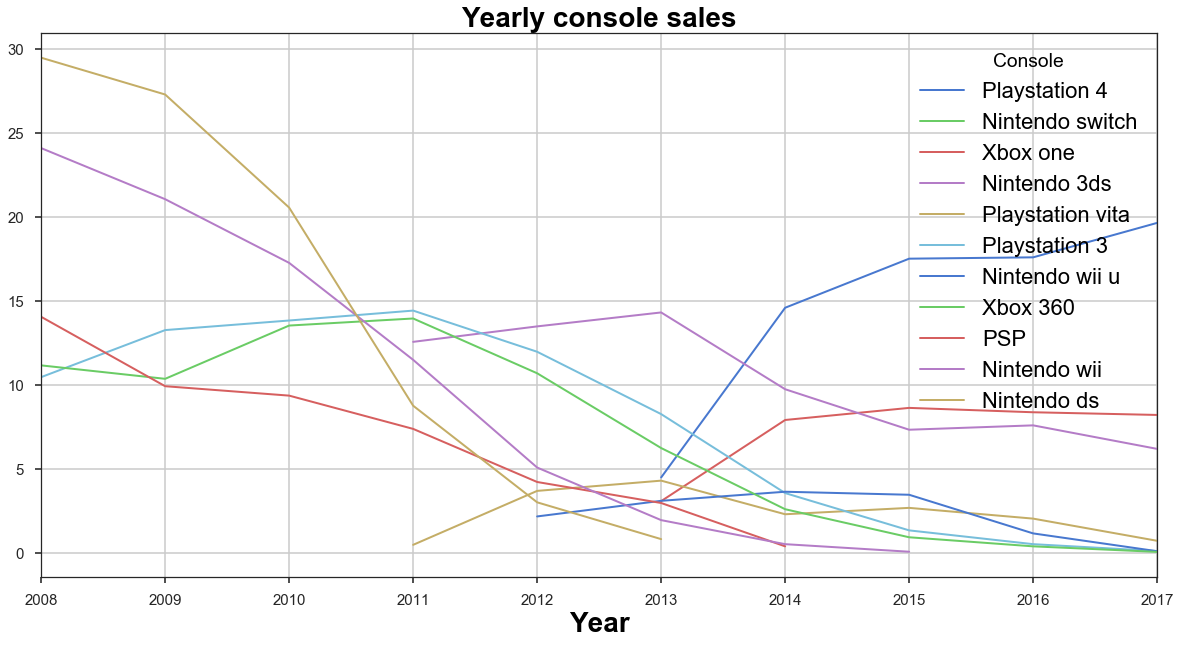

In [28]:
consoles1.plot(y = ['Playstation 4', 'Nintendo switch', 'Xbox one', 'Nintendo 3ds', 'Playstation vita', 'Playstation 3', 'Nintendo wii u',
               'Xbox 360', 'PSP', 'Nintendo wii', 'Nintendo ds'], kind = 'line', title = 'Yearly console sales', figsize = (20,10))

From aove we can see the sales of different consoles over a 10 year period. It looks a bit messy but gives us a good insight into what we should use while doing our results.

## Yearly game sales per console

Getting the yearly sales of games for each console.

In [29]:
console = videogames.groupby('Year_of_Release', as_index = False)['Global_Sales'].sum()
console = console.set_index('Year_of_Release')

In [30]:
nes = videogames[videogames['Platform'] == 'NES']
tmp = nes.groupby('Year_of_Release')['Global_Sales'].sum()
console['NES'] = tmp

In [31]:
wii = videogames[videogames['Platform'] == 'Wii']
tmp = wii.groupby('Year_of_Release')['Global_Sales'].sum()
console['Wii'] = tmp

In [32]:
gb = videogames[videogames['Platform'] == 'GB']
tmp = gb.groupby('Year_of_Release')['Global_Sales'].sum()
console['GB'] = tmp

In [33]:
ds = videogames[videogames['Platform'] == 'DS']
tmp = ds.groupby('Year_of_Release')['Global_Sales'].sum()
console['DS'] = tmp

In [34]:
x360 = videogames[videogames['Platform'] == 'X360']
tmp = x360.groupby('Year_of_Release')['Global_Sales'].sum()
console['X360'] = tmp

In [35]:
ps3 = videogames[videogames['Platform'] == 'PS3']
tmp = ps3.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS3'] = tmp

In [36]:
ps2 = videogames[videogames['Platform'] == 'PS2']
tmp = ps2.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS2'] = tmp

In [37]:
snes = videogames[videogames['Platform'] == 'SNES']
tmp = snes.groupby('Year_of_Release')['Global_Sales'].sum()
console['SNES'] = tmp

In [38]:
gba = videogames[videogames['Platform'] == 'GBA']
tmp = gba.groupby('Year_of_Release')['Global_Sales'].sum()
console['GBA'] = tmp

In [39]:
ps4 = videogames[videogames['Platform'] == 'PS4']
tmp = ps4.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS4'] = tmp

In [40]:
tds = videogames[videogames['Platform'] == '3DS']
tmp = tds.groupby('Year_of_Release')['Global_Sales'].sum()
console['3DS'] = tmp

In [41]:
n64 = videogames[videogames['Platform'] == 'N64']
tmp = n64.groupby('Year_of_Release')['Global_Sales'].sum()
console['N64'] = tmp

In [42]:
ps = videogames[videogames['Platform'] == 'PS']
tmp = ps.groupby('Year_of_Release')['Global_Sales'].sum()
console['PS'] = tmp

In [43]:
xb = videogames[videogames['Platform'] == 'XB']
tmp = xb.groupby('Year_of_Release')['Global_Sales'].sum()
console['XB'] = tmp

In [44]:
pc = videogames[videogames['Platform'] == 'PC']
tmp = pc.groupby('Year_of_Release')['Global_Sales'].sum()
console['PC'] = tmp

In [45]:
a2600 = videogames[videogames['Platform'] == '2600']
tmp = a2600.groupby('Year_of_Release')['Global_Sales'].sum()
console['2600'] = tmp

In [46]:
psp = videogames[videogames['Platform'] == 'PSP']
tmp = psp.groupby('Year_of_Release')['Global_Sales'].sum()
console['PSP'] = tmp

In [47]:
xone = videogames[videogames['Platform'] == 'XOne']
tmp = xone.groupby('Year_of_Release')['Global_Sales'].sum()
console['XOne'] = tmp

In [48]:
wiiu = videogames[videogames['Platform'] == 'WiiU']
tmp = wiiu.groupby('Year_of_Release')['Global_Sales'].sum()
console['WiiU'] = tmp

In [49]:
gc = videogames[videogames['Platform'] == 'GC']
tmp = gc.groupby('Year_of_Release')['Global_Sales'].sum()
console['GC'] = tmp

In [50]:
gen = videogames[videogames['Platform'] == 'GEN']
tmp = gen.groupby('Year_of_Release')['Global_Sales'].sum()
console['GEN'] = tmp

In [51]:
dc = videogames[videogames['Platform'] == 'DC']
tmp = dc.groupby('Year_of_Release')['Global_Sales'].sum()
console['DC'] = tmp

In [52]:
psv = videogames[videogames['Platform'] == 'PSV']
tmp = psv.groupby('Year_of_Release')['Global_Sales'].sum()
console['PSV'] = tmp

In [53]:
sat = videogames[videogames['Platform'] == 'SAT']
tmp = sat.groupby('Year_of_Release')['Global_Sales'].sum()
console['SAT'] = tmp

In [54]:
scd = videogames[videogames['Platform'] == 'SCD']
tmp = scd.groupby('Year_of_Release')['Global_Sales'].sum()
console['SCD'] = tmp

In [55]:
ws = videogames[videogames['Platform'] == 'WS']
tmp = ws.groupby('Year_of_Release')['Global_Sales'].sum()
console['WS'] = tmp

In [56]:
ng = videogames[videogames['Platform'] == 'NG']
tmp = ng.groupby('Year_of_Release')['Global_Sales'].sum()
console['NG'] = tmp

In [57]:
tg16 = videogames[videogames['Platform'] == 'TG16']
tmp = tg16.groupby('Year_of_Release')['Global_Sales'].sum()
console['TG16'] = tmp

In [58]:
dO = videogames[videogames['Platform'] == '3DO']
tmp = dO.groupby('Year_of_Release')['Global_Sales'].sum()
console['3DO'] = tmp

In [59]:
gg = videogames[videogames['Platform'] == 'GG']
tmp = gg.groupby('Year_of_Release')['Global_Sales'].sum()
console['GG'] = tmp

In [60]:
pcfx = videogames[videogames['Platform'] == 'PCFX']
tmp = pcfx.groupby('Year_of_Release')['Global_Sales'].sum()
console['PCFX'] = tmp

In [61]:
del console['Global_Sales']

In [62]:
console.head()

,NES,Wii,GB,DS,X360,PS3,PS2,SNES,GBA,PS4,...,DC,PSV,SAT,SCD,WS,NG,TG16,3DO,GG,PCFX
Year_of_Release,,,,,,,,,,,,,,,,,,,,,
1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,50.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above is a dataframe of the yearly game sales on each console. It can be used in our results notebook to compare one console with another

## Merging dataframes

In [63]:
frames = [console,console_count]
console_yearly = pd.concat(frames, axis = 1)

## Saving to a pickle

In [64]:
console_yearly.to_pickle("../../data/analysis/400_Console_Life_Yearly_Data.pkl")
consoles1.to_pickle("../../data/analysis/400_Console_Sales.pkl")
console_Sales.to_pickle("../../data/analysis/400_Total_Console_Sales.pkl")

In [ ]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())